In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


data = pd.read_csv('homework1_data.csv')

data_long = pd.melt(data, id_vars=['Year'], var_name='Month', value_name='Value')
X = data_long[['Year', 'Month']]
X = pd.get_dummies(data = X, drop_first = True)
data_long.head()
Y = data_long['Value']

model = LinearRegression()
model.fit(X, Y)
# print the intercept

# Print the model's coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")

Intercept: 18.803625743636356
Coefficients:
Year: -0.009393123636363635
Month_Aug: -0.06340005454545472
Month_Dec: 0.06930255454545471
Month_Feb: 0.18145240000000012
Month_Jan: 0.2453658727272729
Month_Jul: -0.054246263636363645
Month_Jun: -0.06098321818181823
Month_Mar: 0.08367772727272724
Month_May: -0.04599120000000012
Month_Nov: -0.013583881818181787
Month_Oct: -0.03148067272727275
Month_Sep: -0.05967956363636367


In [ ]:
# Predicted values
y_pred = model.predict(X)

# Calculate R²
r2 = r2_score(Y, y_pred)
print("R²:", r2)

# Calculate adjusted R²
n = X.shape[0]  # number of observations
p = X.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print("Adjusted R²:", adj_r2)

# Calculate F-score
f_score = (r2 / (1 - r2)) * ((n - p - 1) / p)
print("F-score:", f_score)

# Residuals
residuals = Y - y_pred


R²: 0.6801367268352985
Adjusted R²: 0.6478816068523033
F-score: 21.086163287994783


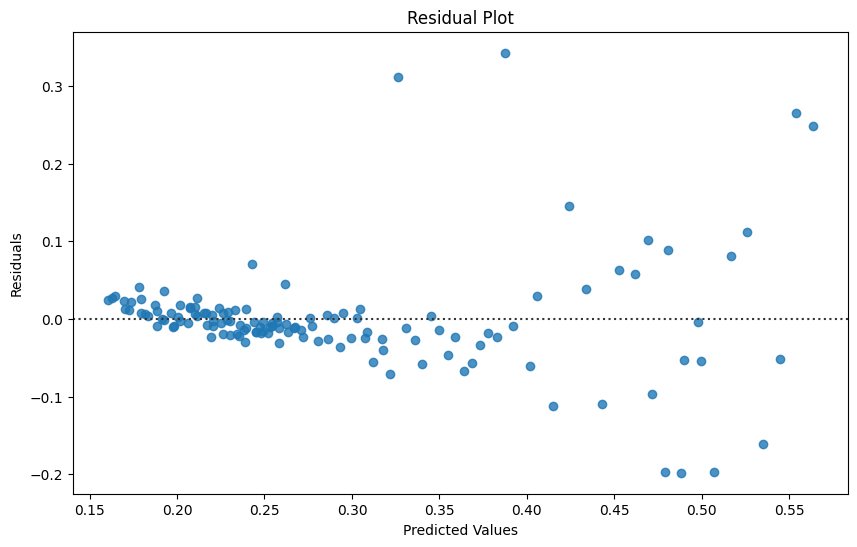

<Figure size 1000x600 with 0 Axes>

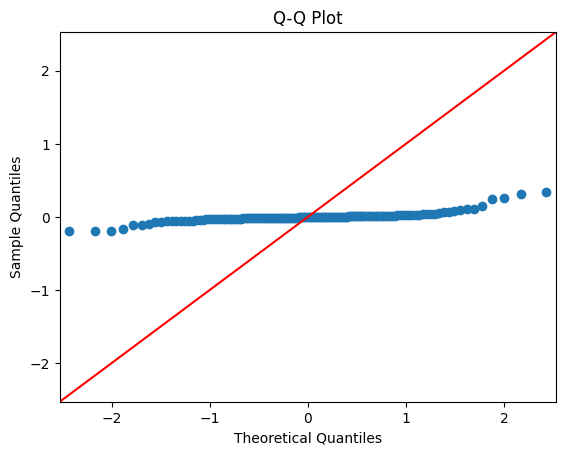

In [ ]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

In [ ]:
# Fit ETS model
ets_model = ExponentialSmoothing(Y, trend='add', seasonal='add', seasonal_periods=12).fit()

# Print ETS model summary
print(ets_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Value   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                              0.803
Optimized:                         True   AIC                           -641.550
Trend:                         Additive   BIC                           -595.425
Seasonal:                      Additive   AICC                          -635.497
Seasonal Periods:                    12   Date:                 Fri, 24 May 2024
Box-Cox:                          False   Time:                         02:00:47
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0910498                alpha                 True
smoothing_trend          

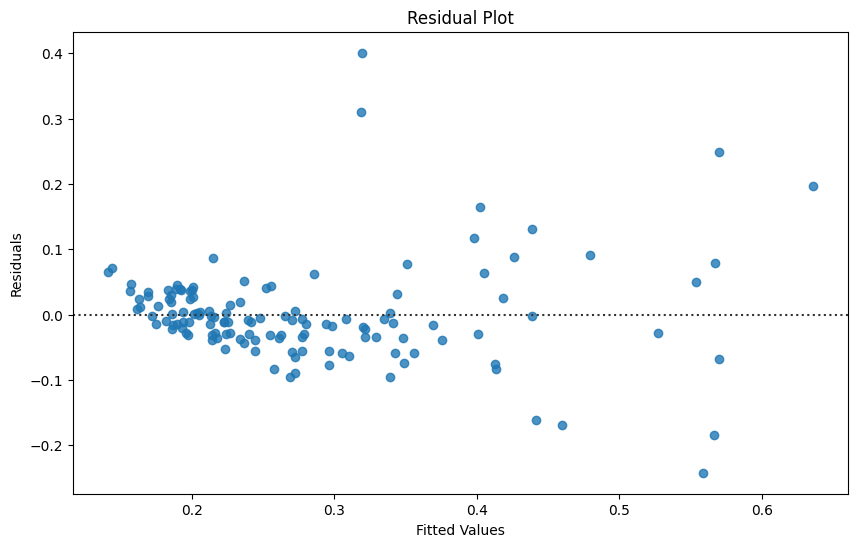

<Figure size 1000x600 with 0 Axes>

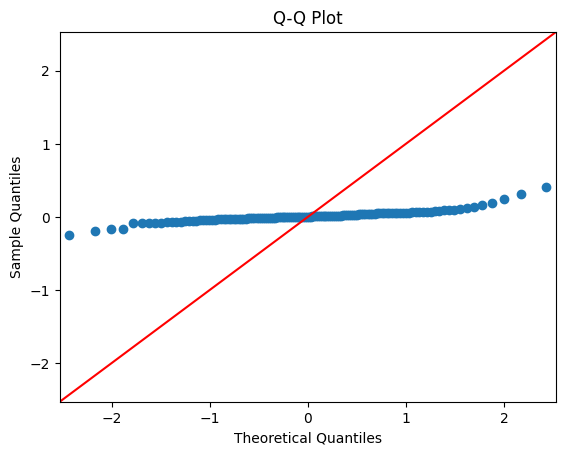

<Figure size 1000x600 with 0 Axes>

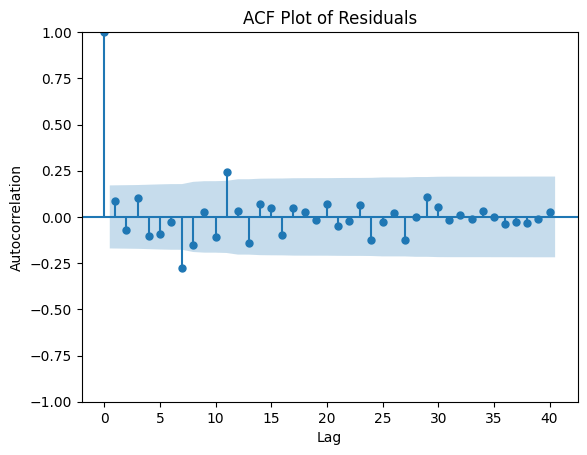

In [ ]:
# Residuals
residuals = ets_model.resid

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=ets_model.fittedvalues, y=residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# ACF Plot
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot of Residuals')
plt.show()

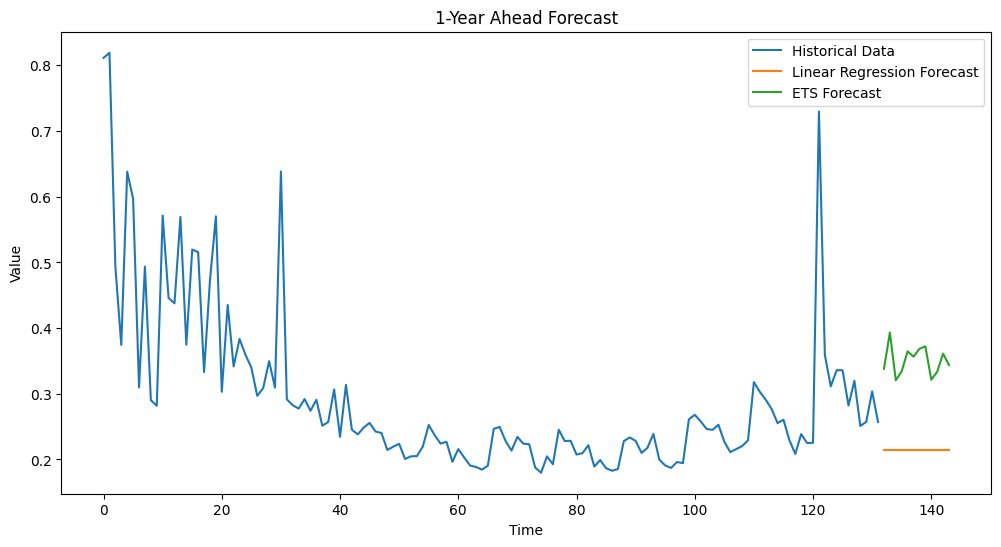

,Year,Month,LinearRegression_Forecast,ETS_Forecast
132,1979,1,0.214634,0.338127
133,1979,2,0.214634,0.393333
134,1979,3,0.214634,0.320560
135,1979,4,0.214634,0.334287
136,1979,5,0.214634,0.364644
137,1979,6,0.214634,0.356490
138,1979,7,0.214634,0.368474
139,1979,8,0.214634,0.372207
140,1979,9,0.214634,0.321430
141,1979,10,0.214634,0.333413


In [ ]:
# Generate future dates
last_year = data['Year'].max()
future_years = [last_year + 1] * 12
future_months = list(range(1, 13))

# Create a DataFrame for future predictions
future_data = pd.DataFrame({'Year': future_years, 'Month': future_months})
future_data = pd.get_dummies(future_data, drop_first=True)

# Align columns
missing_cols = set(X.columns) - set(future_data.columns)
for c in missing_cols:
    future_data[c] = 0
future_data = future_data[X.columns]

# Predict future values
future_predictions_lr = model.predict(future_data)

# Fit ETS model
ets_model = ExponentialSmoothing(Y, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast future values
future_predictions_ets = ets_model.forecast(steps=12)

# Create a DataFrame for the forecasts
forecast_df = pd.DataFrame({
    'Year': future_years,
    'Month': future_months,
    'LinearRegression_Forecast': future_predictions_lr,
    'ETS_Forecast': future_predictions_ets
})

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data_long['Value'], label='Historical Data')
plt.plot(range(len(data_long), len(data_long) + 12), future_predictions_lr, label='Linear Regression Forecast')
plt.plot(range(len(data_long), len(data_long) + 12), future_predictions_ets, label='ETS Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('1-Year Ahead Forecast')
plt.show()

forecast_df


In [ ]:
import calendar

current_year = data['Year'].max()
forecast_year = current_year + 1
months = list(calendar.month_name[1:])  # List of month names

forecast_data = pd.DataFrame({
    'Year': [forecast_year] * 12,
    'Month': months
})

# Standardize the month names in the forecast data
forecast_data['Month'] = forecast_data['Month'].apply(lambda x: x[:3])

# Prepare the features for prediction again
forecast_X = pd.get_dummies(data=forecast_data, drop_first=True)
missing_cols = set(X.columns) - set(forecast_X.columns)
for col in missing_cols:
    forecast_X[col] = 0
forecast_X = forecast_X[X.columns]

model.fit(X, Y)

# Predict the values
forecast_values = model.predict(forecast_X)

# Combine the forecasted values with the months
forecast_data['Forecasted_Value'] = forecast_values


forecast_data


,Year,Month,Forecasted_Value
0,1979,Jan,0.460000
1,1979,Feb,0.396086
2,1979,Mar,0.298312
3,1979,Apr,0.214634
4,1979,May,0.168643
5,1979,Jun,0.153651
6,1979,Jul,0.160388
7,1979,Aug,0.151234
8,1979,Sep,0.154955
9,1979,Oct,0.183153


<ipython-input-48-b77254428d25>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_long['Date'] = pd.to_datetime(data_long['Year'].astype(str) + '-' + data_long['Month'])
<ipython-input-48-b77254428d25>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  forecast_data['Date'] = pd.to_datetime(forecast_data['Year'].astype(str) + '-' + forecast_data['Month'])


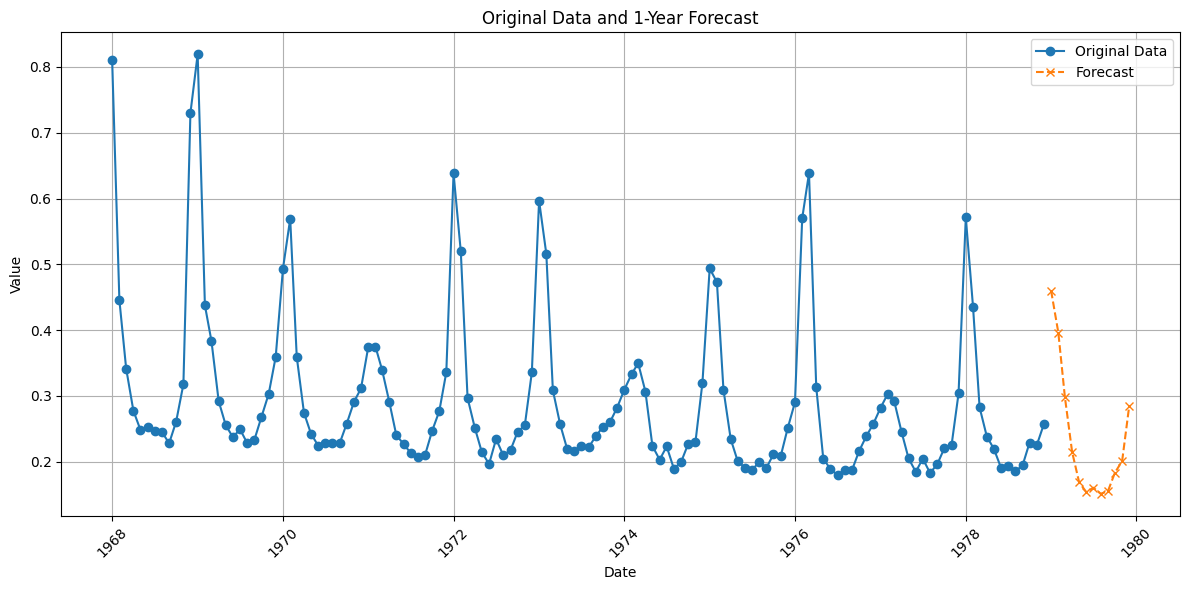

In [ ]:

# Prepare the original data for plotting
data_long['Date'] = pd.to_datetime(data_long['Year'].astype(str) + '-' + data_long['Month'])
data_long_sorted = data_long.sort_values('Date')

# Prepare the forecast data for plotting
forecast_data['Date'] = pd.to_datetime(forecast_data['Year'].astype(str) + '-' + forecast_data['Month'])
forecast_data_sorted = forecast_data.sort_values('Date')

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data_long_sorted['Date'], data_long_sorted['Value'], label='Original Data', marker='o')
plt.plot(forecast_data_sorted['Date'], forecast_data_sorted['Forecasted_Value'], label='Forecast', marker='x', linestyle='--')

plt.title('Original Data and 1-Year Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
forecast = ets_model.predict(start=len(Y), end=len(Y) + 11)

# Display the forecasted values
print(forecast)

132    0.338127
133    0.393333
134    0.320560
135    0.334287
136    0.364644
137    0.356490
138    0.368474
139    0.372207
140    0.321430
141    0.333413
142    0.361172
143    0.343667
dtype: float64
